In [527]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [528]:
data=pd.read_csv('HeartDiseaseTrain-Test.csv')

In [529]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [530]:
data.shape

(1025, 14)

In [531]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [532]:
data['chest_pain_type'].unique()

array(['Typical angina', 'Atypical angina', 'Non-anginal pain',
       'Asymptomatic'], dtype=object)

In [533]:
data['fasting_blood_sugar'].unique()

array(['Lower than 120 mg/ml', 'Greater than 120 mg/ml'], dtype=object)

In [534]:
data.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [535]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['sex']=le.fit_transform(data['sex'])

In [536]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,1,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,1,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,1,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,0,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [537]:
data['vessels_colored_by_flourosopy'].unique()

array(['Two', 'Zero', 'One', 'Three', 'Four'], dtype=object)

In [538]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

trans = ColumnTransformer(transformers=[
    ('t1', OneHotEncoder(drop='first'), ['chest_pain_type']),
    ('t2', OneHotEncoder(drop='first'), ['rest_ecg']),
    ('t3', OneHotEncoder(drop='first'), ['slope']),
    ('t4', OrdinalEncoder(categories=[["Zero", "One", "Two", "Three", "Four"]]), ['vessels_colored_by_flourosopy']),
    ('t5', OneHotEncoder(drop='first'), ['thalassemia'])
], remainder='passthrough')


In [539]:
data=trans.fit_transform(data)

In [540]:
column=['chest_pain_type_1','chest_pain_type_2','chest_pain_type_3','rest_ecg_1','rest_ecg_2','slope_1','slope_2','vessels_colored_by_flourosopy','thalassemia_1','thalassemia_2','thalassemia_3','age','sex','resting_blood_pressure','cholestoral','fasting_blood_sugar'
        ,'Max_heart_rate','exercise_induced_angina','oldpeak','target']

In [541]:
data_new=pd.DataFrame(data,columns=column)

In [542]:
data_new.head()

,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,rest_ecg_1,rest_ecg_2,slope_1,slope_2,vessels_colored_by_flourosopy,thalassemia_1,thalassemia_2,thalassemia_3,age,sex,resting_blood_pressure,cholestoral,fasting_blood_sugar,Max_heart_rate,exercise_induced_angina,oldpeak,target
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,52,1,125,212,Lower than 120 mg/ml,168,No,1.0,0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,53,1,140,203,Greater than 120 mg/ml,155,Yes,3.1,0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,70,1,145,174,Lower than 120 mg/ml,125,Yes,2.6,0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,61,1,148,203,Lower than 120 mg/ml,161,No,0.0,0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,62,0,138,294,Greater than 120 mg/ml,106,No,1.9,0


In [543]:
data_new['fasting_blood_sugar'].unique()

array(['Lower than 120 mg/ml', 'Greater than 120 mg/ml'], dtype=object)

In [544]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_new['fasting_blood_sugar'] = le.fit_transform(data_new['fasting_blood_sugar'])
data_new['exercise_induced_angina'] = le.fit_transform(data_new['exercise_induced_angina'])

# Convert all instances of class 1 to class 0
data_new['fasting_blood_sugar'] = data_new['fasting_blood_sugar'].replace({1: 0,0:1})


In [545]:
data_new.head()

,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,rest_ecg_1,rest_ecg_2,slope_1,slope_2,vessels_colored_by_flourosopy,thalassemia_1,thalassemia_2,thalassemia_3,age,sex,resting_blood_pressure,cholestoral,fasting_blood_sugar,Max_heart_rate,exercise_induced_angina,oldpeak,target
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,52,1,125,212,0,168,0,1.0,0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,53,1,140,203,1,155,1,3.1,0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,70,1,145,174,0,125,1,2.6,0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,61,1,148,203,0,161,0,0.0,0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,62,0,138,294,1,106,0,1.9,0


In [546]:
data_new['oldpeak']=data_new['oldpeak'].astype(float)

In [547]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   chest_pain_type_1              1025 non-null   object 
 1   chest_pain_type_2              1025 non-null   object 
 2   chest_pain_type_3              1025 non-null   object 
 3   rest_ecg_1                     1025 non-null   object 
 4   rest_ecg_2                     1025 non-null   object 
 5   slope_1                        1025 non-null   object 
 6   slope_2                        1025 non-null   object 
 7   vessels_colored_by_flourosopy  1025 non-null   object 
 8   thalassemia_1                  1025 non-null   object 
 9   thalassemia_2                  1025 non-null   object 
 10  thalassemia_3                  1025 non-null   object 
 11  age                            1025 non-null   object 
 12  sex                            1025 non-null   o

In [548]:
column_1=['chest_pain_type_1','chest_pain_type_2','chest_pain_type_3','rest_ecg_1','rest_ecg_2','slope_1','slope_2','vessels_colored_by_flourosopy','thalassemia_1','thalassemia_2','thalassemia_3','age','sex','resting_blood_pressure','cholestoral','fasting_blood_sugar'
        ,'Max_heart_rate','exercise_induced_angina','target']

In [549]:
data_new[column_1]=data_new[column_1].astype(int)

In [550]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   chest_pain_type_1              1025 non-null   int32  
 1   chest_pain_type_2              1025 non-null   int32  
 2   chest_pain_type_3              1025 non-null   int32  
 3   rest_ecg_1                     1025 non-null   int32  
 4   rest_ecg_2                     1025 non-null   int32  
 5   slope_1                        1025 non-null   int32  
 6   slope_2                        1025 non-null   int32  
 7   vessels_colored_by_flourosopy  1025 non-null   int32  
 8   thalassemia_1                  1025 non-null   int32  
 9   thalassemia_2                  1025 non-null   int32  
 10  thalassemia_3                  1025 non-null   int32  
 11  age                            1025 non-null   int32  
 12  sex                            1025 non-null   i

In [551]:
data_new.head()

,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,rest_ecg_1,rest_ecg_2,slope_1,slope_2,vessels_colored_by_flourosopy,thalassemia_1,thalassemia_2,thalassemia_3,age,sex,resting_blood_pressure,cholestoral,fasting_blood_sugar,Max_heart_rate,exercise_induced_angina,oldpeak,target
0,0,0,1,0,1,0,0,2,0,0,1,52,1,125,212,0,168,0,1.0,0
1,0,0,1,1,0,0,1,0,0,0,1,53,1,140,203,1,155,1,3.1,0
2,0,0,1,0,1,0,1,0,0,0,1,70,1,145,174,0,125,1,2.6,0
3,0,0,1,0,1,0,0,1,0,0,1,61,1,148,203,0,161,0,0.0,0
4,0,0,1,0,1,1,0,3,0,0,0,62,0,138,294,1,106,0,1.9,0


In [552]:
x=data_new.drop('target',axis=1)

In [553]:
y=data_new['target']

In [554]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [555]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)  # Converts to NumPy array
data_scaled=scaler.transform(x_train)
data_scaled_test=scaler.transform(x_test)
# Convert back to DataFrame (if needed)
import pandas as pd
x_train = pd.DataFrame(data_scaled, columns=x_train.columns)
x_test = pd.DataFrame(data_scaled_test, columns=x_train.columns)


In [556]:
x_train.head()

,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,rest_ecg_1,rest_ecg_2,slope_1,slope_2,vessels_colored_by_flourosopy,thalassemia_1,thalassemia_2,thalassemia_3,age,sex,resting_blood_pressure,cholestoral,fasting_blood_sugar,Max_heart_rate,exercise_induced_angina,oldpeak
0,-0.430083,1.606483,-0.971148,1.009804,-0.980675,-0.959362,-0.265511,2.171691,-0.049447,-0.26287,-0.814424,-0.585840,0.654654,-0.779454,-1.935031,-0.414039,-1.019094,-0.725949,-0.210661
1,-0.430083,-0.622478,1.029709,-0.990291,1.019706,-0.959362,-0.265511,-0.725467,-0.049447,-0.26287,-0.814424,1.051477,-1.527525,2.741732,1.610634,-0.414039,0.202882,1.377507,-0.912152
2,-0.430083,1.606483,-0.971148,1.009804,-0.980675,-0.959362,-0.265511,-0.725467,-0.049447,-0.26287,-0.814424,-0.040068,-1.527525,-1.347387,0.442176,-0.414039,0.770228,-0.725949,-0.912152
3,-0.430083,-0.622478,1.029709,-0.990291,1.019706,1.042360,-0.265511,-0.725467,-0.049447,-0.26287,1.227862,0.505705,0.654654,0.186033,-0.222636,-0.414039,0.508376,-0.725949,-0.473720
4,-0.430083,1.606483,-0.971148,1.009804,-0.980675,1.042360,-0.265511,-0.725467,-0.049447,-0.26287,-0.814424,-0.367531,0.654654,-0.381900,-0.001032,2.415229,0.726586,-0.725949,1.192321


In [557]:
## trying logestic regression on oue data

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [558]:
y_pred=lr.predict(x_test)

In [559]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

0.20772946859903374


In [560]:
lr.intercept_

array([-0.07503063])

In [561]:
lr.coef_

array([[-0.30525183, -0.15293341, -1.06518483,  0.07743883,  0.25217938,
        -0.4387068 , -0.02951471, -0.88365477, -0.22577359,  0.07125558,
        -0.69383335,  0.02423682, -0.7215875 , -0.26705084, -0.45356913,
        -0.0068953 ,  0.51416297, -0.31405891, -0.67788437]])

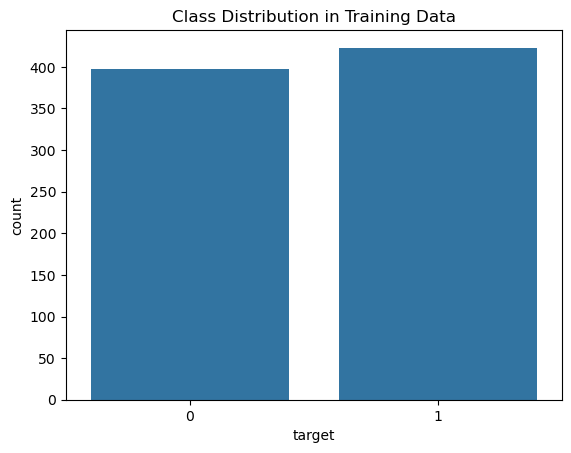

In [562]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_train)
plt.title("Class Distribution in Training Data")
plt.show()


In [563]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

model = LogisticRegression()
model.fit(X_train_poly, y_train)


LogisticRegression()

In [564]:
y_pred=model.predict(X_test_poly)

In [565]:
r2_score(y_test,y_pred)

0.9414620217018846

In [570]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=6)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [571]:
y_pred=dtc.predict(x_test)

In [572]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8780487804878049


In [573]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[85 17]
 [ 8 95]]


In [574]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.8482142857142857
Recall: 0.9223300970873787
F1-Score: 0.8837209302325582


In [580]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000,max_depth=10,n_jobs=-1)
rfc.fit(x_train,y_train)


RandomForestClassifier(max_depth=10, n_estimators=1000, n_jobs=-1)

In [581]:
y_pred=rfc.predict(x_test)

In [582]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [583]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Confusion Matrix:
 [[102   0]
 [  3 100]]


In [584]:
from sklearn.model_selection import GridSearchCV

In [585]:
# Base model
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [500, 1000, 1500],   # Number of trees in the forest
    'max_depth': [5, 10, 20, None],      # Maximum depth of trees
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],       # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2'],    # Number of features to consider at each split
    'criterion': ['gini', 'entropy']     # Splitting criteria
}


In [587]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Print best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [588]:
# Get the best model
best_rfc = grid_search.best_estimator_

# Make predictions
y_pred_best = best_rfc.predict(x_test)

# Evaluate Performance
print("\nTuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))



Tuned Random Forest Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Confusion Matrix:
 [[102   0]
 [  3 100]]


In [589]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_rfc, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Scores: [1.         0.95731707 1.         0.98780488 0.95731707]
Mean Accuracy: 0.9804878048780488
Standard Deviation: 0.01943582615915761


In [591]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.5 MB/s eta 0:01:39
   ---------------------------------------- 0.8/150.0 MB 1.6 MB/s eta 0:01:34
   ---------------------------------------- 1.0/150.0 MB 1.3 MB/s eta 0:01:53
   ---------------------------------------- 1.3/150.0 MB 1.4 MB/s eta 0:01:45
   ---------------------------------------- 1.8/150.0 MB 1.6 MB/s eta 0:01:35
    --------------------------------------- 2.1/150.0 MB 1.6 MB/s eta 0:01:31
    --------------------------------------- 2.6/150.0 MB 1.7 MB/s eta 0:01:28
    --------------------------------------- 2.9/150.0 MB 1.7 MB/s eta 0:01:29
    --------------------------------------- 3.1/150.0 MB 1.7 MB/s eta 0:01:29
    --------------------------------------- 3.4/150.0 MB 1.7 MB/s eta 0:01:29
   - -------------------------------------- 3.9/150.0 MB 1.7 MB/s eta 0:01:29


In [592]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [593]:
# Initialize XGBoost model
xgb = XGBClassifier(n_estimators=1000, max_depth=10, learning_rate=0.1, random_state=42, n_jobs=-1)

# Train the model
xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=-1, num_parallel_tree=None, ...)

In [594]:
y_pred_xgb = xgb.predict(x_test)


In [595]:
# Accuracy
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Confusion Matrix:
 [[102   0]
 [  3 100]]


so xg boost is giving us the best accuracy so applying grid search cv on this for the best parameters


In [596]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [500, 1000],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(XGBClassifier(n_jobs=-1, random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search_xgb.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500, 'subsample': 1.0}


In [599]:
xg_model=grid_search_xgb.best_estimator_

In [600]:
y_pred_xgb=xg_model.predict(x_test)

In [602]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(xg_model,x,y,cv=5,scoring='accuracy',n_jobs=-1))

0.9970731707317073

now we will finilize this model
